In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [2]:
lmbda = 1.0

In [3]:
# dystrybuanta
# 1 - exp(-lbmda*t)
# odwrócona dystrybuanta, y -> jednostajny
# t = -ln(y)/lmbda


$\text{8. }$
$\text{Plot number of signals received by server on interval}$
$ t = (0,90)$

In [4]:
def get_events_in_time(time_boundary = (0,90), lmbda = 1.0):
# timeBoundary= (0, 90)
    buff = 0
    events_time = [buff]
    while 1:
        buff += -np.log(np.random.random()) / lmbda
        events_time.append(buff)
        if(buff > time_boundary[1]):
            break;
    return events_time
        

In [5]:
events_time = get_events_in_time()

In [6]:
def draw_events_in_time(events_in_time, num_of_plots= 4):
    """
    Function to draw events in time
    """
    for k in range(num_of_plots):
        events_time = get_events_in_time()
        plt.plot(events_time, range(len(events_time)))
    plt.ylabel("received signals count")
    plt.xlabel("time")
    plt.title("Received signals by server in time")
    plt.show()
    pass

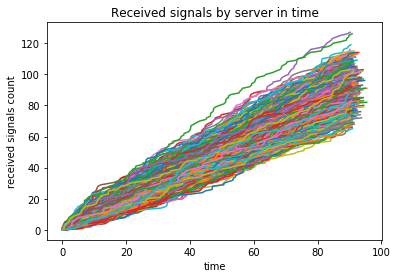

In [7]:
draw_events_in_time(events_time,num_of_plots=1000)

In [8]:
N = 10**4
timed_events_list = []
for k in range(N):
    timed_events_list.append(np.array(get_events_in_time()))


In [9]:
events_count = [[],[],[]]
t_eval = (1.0, 20.0, 90.0)
for elem in timed_events_list: 
    events_count[0].append(np.max(np.where(elem <= t_eval[0])))
    events_count[1].append(np.max(np.where(elem <= t_eval[1] )))
    events_count[2].append(np.max(np.where(elem <= t_eval[2] )))
events_count_array = np.array(events_count)

In [10]:
events_count_array[0,:]
x_vec = np.linspace(0, np.max(events_count_array[0,:]) ,np.max(events_count_array[0,:])*2)
x_vec

array([0.        , 0.53846154, 1.07692308, 1.61538462, 2.15384615,
       2.69230769, 3.23076923, 3.76923077, 4.30769231, 4.84615385,
       5.38461538, 5.92307692, 6.46153846, 7.        ])

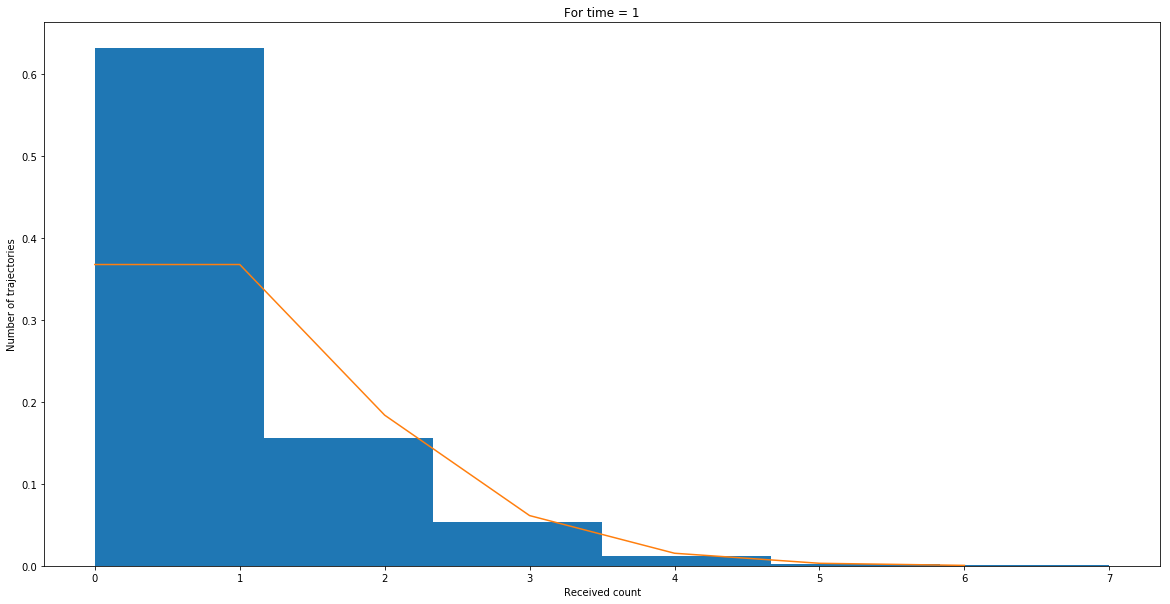

In [11]:
t0=1
x_vec = np.array(range(max(events_count_array[0,:])))
plt.figure(figsize=(20,10))
plt.title("For time = 1")
plt.xlabel("Received count")
plt.ylabel("Number of trajectories")
plt.hist(events_count_array[0,:], bins=np.max(events_count_array[0,:])-1, normed=1)
plt.plot(x_vec, ss.poisson.pmf(x_vec,1.0))
plt.show()

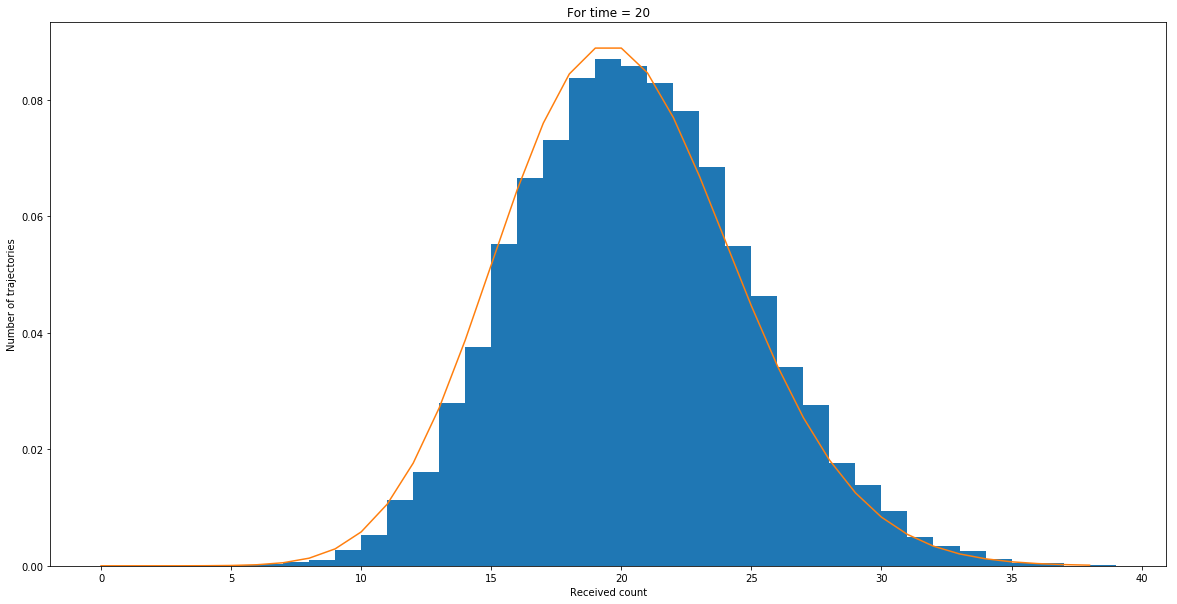

In [12]:
t1 = 20
x_vec = np.array(range(max(events_count_array[1,:])))
plt.figure(figsize=(20,10))
plt.title("For time = 20")
plt.xlabel("Received count")
plt.ylabel("Number of trajectories")
plt.hist(events_count_array[1,:], bins=np.max(events_count_array[1,:])-np.min(events_count_array[1,:]), normed=1)
plt.plot(x_vec, ss.poisson.pmf(x_vec,20))
plt.show()

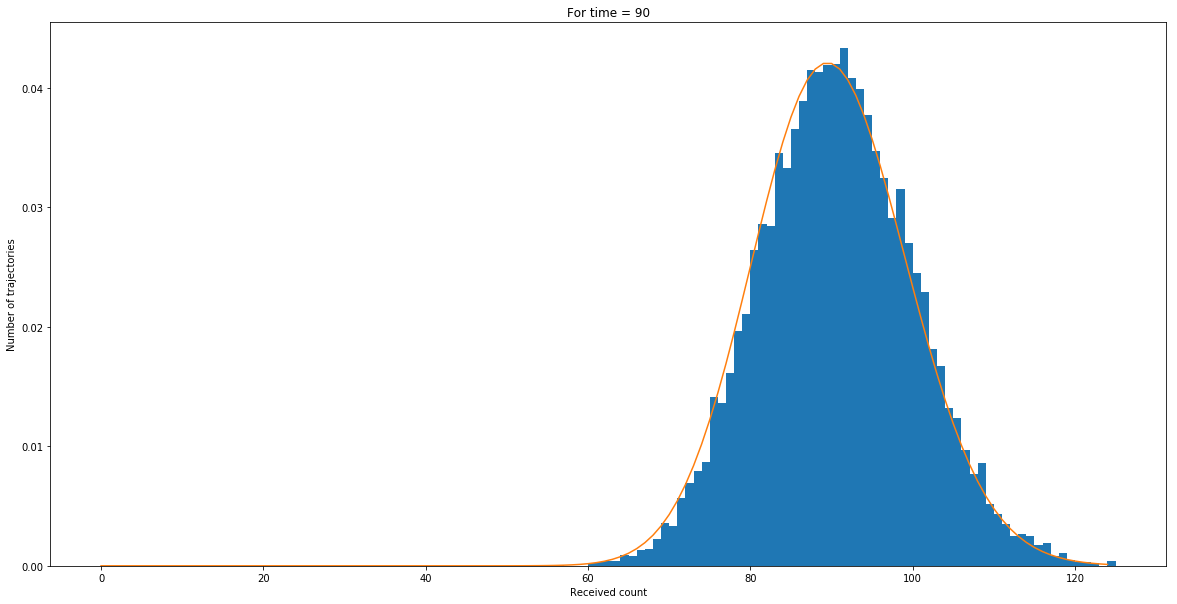

In [13]:
t2 = 90
x_vec = np.array(range(max(events_count_array[2,:])))
plt.figure(figsize=(20,10))
plt.title("For time = 90")
plt.xlabel("Received count")
plt.ylabel("Number of trajectories")
plt.hist(events_count_array[2,:], bins=np.max(events_count_array[2,:])-np.min(events_count_array[2,:]), normed=1)
plt.plot(x_vec, ss.poisson.pmf(x_vec,t2))
plt.show()

$\text{Zadanie 10. }$

In [14]:
counts = (2,5,10,50)

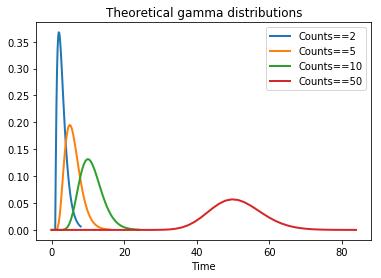

In [39]:
gamma_distr = ss.gamma(counts[0],lmbda)
x = np.linspace(0,8) 
plt.plot(x, gamma_distr.pdf(x), lw=2, label='Counts==2')
gamma_distr = ss.gamma(counts[1],lmbda)
x = np.linspace(0,16) 
plt.plot(x, gamma_distr.pdf(x), lw=2, label='Counts==5')
gamma_distr = ss.gamma(counts[2],lmbda)
x = np.linspace(0,24) 
plt.plot(x, gamma_distr.pdf(x), lw=2, label='Counts==10')
gamma_distr = ss.gamma(counts[3],lmbda)
x = np.linspace(0,84) 
plt.plot(x, gamma_distr.pdf(x), lw=2, label='Counts==50')
plt.title("Theoretical gamma distributions")
plt.xlabel("Time")
plt.legend()
plt.show()

### Distribution of waiting for k = 2,5,10,50 events
`It is ` _gamma_ `distribution`

Let's move to experimental simulation results

In [40]:
wait_for_count = [[],[],[],[]]
counts = (2,5,10,50)
for elem in timed_events_list: 
    for idx, count in enumerate(counts):        
        wait_for_count[idx].append(elem[count])

In [41]:
# array_timed_events = np.array(timed_events_lis
wait_for_count =np.array(wait_for_count)
bining = 24

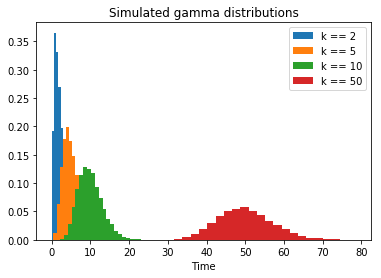

In [42]:
plt.hist(wait_for_count[0,:], bins=bining, label='k == 2', normed=1)
plt.hist(wait_for_count[1,:], bins=bining, label='k == 5', normed=1)
plt.hist(wait_for_count[2,:], bins=bining, label='k == 10', normed=1)
plt.hist(wait_for_count[3,:], bins=bining, label='k == 50', normed=1)
plt.title("Simulated gamma distributions")
plt.xlabel("Time")
plt.legend()
plt.show()

###### Expected value and  standard deviation


In [49]:
print("Theoretical expected value: ")
print("{}, {}, {}, {}".format(2./1.,5./1.,10./1.,50./1.))
print("Theoretical standard deviation: ")
print("{}, {}, {}, {}".format(np.sqrt(2.), np.sqrt(5.), np.sqrt(10.), np.sqrt(50.) ))

Theoretical expected value: 
2.0, 5.0, 10.0, 50.0
Theoretical standard deviation: 
1.4142135623730951, 2.23606797749979, 3.1622776601683795, 7.0710678118654755


In [61]:
expectedValue = np.zeros(4)
stdDev = np.zeros(4)
for k in range(4):
    expectedValue[k] = sum(wait_for_count[k,:])/len(wait_for_count[k,:])
    
    for m in wait_for_count[k,:]:
        stdDev[k] += (m-expectedValue[k])**2
    stdDev[k] = np.sqrt(stdDev[k]/len(wait_for_count[k,:]))

In [63]:
print("Experimental expected value: ")
print("{}, {}, {}, {}".format(expectedValue[0], expectedValue[1], expectedValue[2],expectedValue[3]))
print("Experimental standard deviation: ")
print("{}, {}, {}, {}".format(stdDev[0], stdDev[1], stdDev[2], stdDev[3]))

Experimental expected value: 
2.016058310933044, 5.006544688645785, 9.996373796039856, 49.931047063993454
Experimental standard deviation: 
1.4294322289787103, 2.235466700448447, 3.1629055581712895, 7.017803012576294
